In [23]:
# Imports
# You will probably need to install Tensorflow & Keras
# Note: TensorFlow & Numpy often have version mismatches & 
#       you may need to roll back your Numpy version
import os
import sys

import sklearn
import scipy.io as scipy
import numpy as np
import matplotlib.image as mpimg
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from skimage.transform import resize

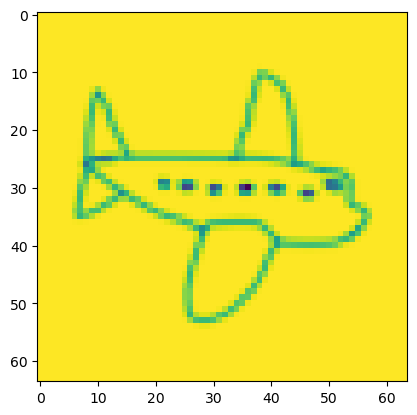

In [24]:
def load_images_from_folder(root_folder, target_size=(32,32)):
    images = []
    labels = []
    
    for class_folder in os.listdir(root_folder):
        class_folder_path = os.path.join(root_folder, class_folder)
        if os.path.isdir(class_folder_path):
            i = 0
            for image_name in os.listdir(class_folder_path):
                image_path = os.path.join(class_folder_path, image_name)
                try:
                    img = mpimg.imread(image_path)
                    img = resize(img, target_size)
                    #plt.imshow(img, cmap='gray')
                    img_array = np.array(img)
                    images.append(img_array)
                    labels.append(class_folder)  # Use folder name as label
                except Exception as e:
                    print(f"Error loading image {image_path}: {str(e)}")

    return np.array(images), np.array(labels)
    
path = "D:\Documents\CSE\CSE404\JupyterNotebooks\data"
data = load_images_from_folder(path, (64,64))
plt.imshow(data[0][0])

In [25]:
def shuffle_data(data):
    images, labels = data
    
    indices = np.random.permutation(len(images))
    images = images[indices]
    labels = labels[indices]
    
    return images, labels

def classify_labels(labels):
    new_labels = []
    # Initialize an empty dictionary
    object_dict = {}
    
    # Open the file and read its contents
    with open("D:\Documents\CSE\CSE404\JupyterNotebooks\map_id_label.txt", "r") as file:
        # Iterate over each line in the file
        for line in file:
            # Split the line based on the comma delimiter
            parts = line.strip().split(",")
            # Extract the key and value from the split parts
            value = int(parts[0])  # Convert the key to integer
            key = parts[1]
            # Add the key-value pair to the dictionary
            object_dict[key] = int(value)

    for i, c in enumerate(labels):
        if c in object_dict:
            new_labels.append(object_dict[c])
    
    return np.array(new_labels)

images, labels = data[0], data[1]
labels = classify_labels(labels)
labels

array([  1,   1,   1, ..., 250, 250, 250])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.20, train_size=0.80, random_state = 42)

# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# 
# model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(251))

# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

num_classes = 251

model = models.Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(64,64,1)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [27]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()
# history = model.fit(X_train, y_train, epochs=10, 
#                     validation_data=(X_test, y_test))


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 64, 64, 16)        160       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 32, 32, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 8, 8, 64)        

In [31]:
history = model.fit(
  X_train, y_train,
  validation_data=(X_test, y_test),
  epochs=250
)


Epoch 1/250
146/500 [=======>......................] - ETA: 8s - loss: 5.5212 - accuracy: 0.0036

KeyboardInterrupt: 

125/125 - 1s - loss: 5.5321 - accuracy: 0.0020 - 780ms/epoch - 6ms/step
0.0020000000949949026


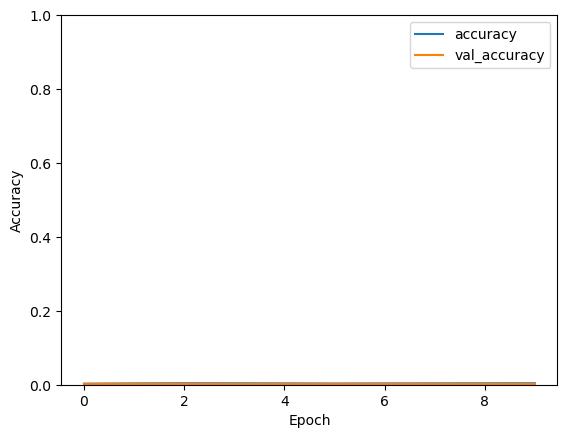

In [30]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend()

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print(test_acc)